In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
from IPython.display import display, Latex, Math
e = 2.718281828459045
pi = 3.141592653589793

In [818]:
class AlgebraicExpression:
  consts = {
      'e'     : 2.718281828459045,
      'pi'    : 3.141592653589793,
      'tau'   : 6.283185307179586,
      'sqrt2' : 1.4142135623730951,
      'phi'   : 1.618033988749894,
      'gamma' : 0.577215664901532860
  }

class Sum(AlgebraicExpression):
  def __init__(self, a, b):
    self.a = a
    self.b = b

  def __repr__(self):
    return f'({self.a} + {self.b})'

  def evaluate(self, vars):
    return self.a.evaluate(vars) + self.b.evaluate(vars)

class Minus(AlgebraicExpression):
  def __init__(self, a, b):
    self.a = a
    self.b = b

  def __repr__(self):
    return f'({self.a} - {self.b})'

  def evaluate(self, vars):
    return self.a.evaluate(vars) - self.b.evaluate(vars)

class Product(AlgebraicExpression):
  def __init__(self, a, b):
    self.a = a
    self.b = b

  def __repr__(self):
    return f'({self.a} * {self.b})'

  def evaluate(self, vars):
    return self.a.evaluate(vars) * self.b.evaluate(vars)

class Division(AlgebraicExpression):
  def __init__(self, a, b):
    self.a = a
    self.b = b

  def __repr__(self):
    return f'([{self.a}] / [{self.b}])'

  def evaluate(self, vars):
    return self.a.evaluate(vars) / self.b.evaluate(vars)

class Power(AlgebraicExpression):
  def __init__(self, a, b):
    self.a = a
    self.b = b

  def __repr__(self):
    return f'{self.a}^({self.b})'

  def evaluate(self, vars):
    return self.a.evaluate(vars) ** self.b.evaluate(vars)

class Root(AlgebraicExpression):
  def __init__(self, a, b):
    self.a = a
    self.b = b

  def __repr__(self):
    return f'{self.b}-Root({self.a})'

  def evaluate(self, vars):
    return self.a.evaluate(vars) ** (1 / self.b.evaluate(vars))

class Logarithm(AlgebraicExpression):
  def __init__(self, a, b):
    self.a = a
    self.b = b

  def __repr__(self):
    return f'Log_{self.b}({self.a})'

  def evaluate(self, vars):
    return Log.log(self.a.evaluate(vars), self.b.evaluate(vars))

class Variable(AlgebraicExpression):
  def __init__(self, name):
    self.name = name

  def __repr__(self):
    return self.name

  def evaluate(self, vars):
    return vars[self.name]

class Constant(AlgebraicExpression):
  def __init__(self, value):
    self.value = value

  def __repr__(self):
    return '(' + str(self.value) + ')'

  def evaluate(self, vars):
    if isinstance(self.value, str):
      return Constant.consts[self.value]
    else:
      return self.value

class Infinite():
  def __init__(self, neg = False):
    self.neg_inf = neg

  def __add__(self, n):
    return self

  def __radd__(self, n):
    return self
  
  def __sub__(self, n):
    return self

  def __rsub__(self, n):
    return -self
  
  def __neg__(self):
    if self.neg_inf == False:
      return Infinite(neg = True)
    else:
      return Infinite()
  
  def __mul__(self, n):
    return self

  def __rmul__(self, n):
    return self

  def __truediv__(self, n):
    return self

  def __rtruediv__(self, n):
    return 0

  def __float__(self):
    if not self.neg_inf:
      return float('inf')
    else:
      return float('-inf')

  def __repr__(self):
    if not self.neg_inf:
      return 'Infinite'
    else:
      return '-Infinite'
  
class Undefined():
  def __add__(self, n):
    return self
  def __radd__(self, n):
    return self
  def __sub__(self, n):
    return self
  def __rsub__(self, n):
    return self
  def __mul__(self, n):
    return self
  def __rmul__(self, n):
    return self
  def __truediv__(self, n):
    return self
  def __rtruediv__(self, n):
    return self
  def __floordiv__(self, n):
    return self
  def __rfloordiv__(self, n):
    return self
  def __pow__(self, n):
    return self
  def __rpow__(self, n):
    return self
  def __neg__(self):
    return self
  def __bool__(self):
    return False
  def __str__(self):
    return 'undefined'
  def __repr__(self):
    return 'undefined'

In [2]:
#Comprobar si un numero es entero
def round_int(n, neg = False):
  ceil_thresh = 0.99
  floor_thresh = 0.001
  if isinstance(n, Complex):
    return Complex(round_int(n.a), round_int(n.b))
  elif isinstance(n, complex):
    return complex(round_int(n.real), round_int(n.imag))
  elif isinstance(n, (tuple, list, set, np.ndarray)):
    return [round_int(i) for i in n]
  if n > 0:
    if n % 1 >= ceil_thresh or n % 1 <= floor_thresh:
      return int(round(n)) if not neg else -int(round(n))
  elif n < 0:
    return round_int(abs(n), True)
  return n if neg == False else -n

def is_iter(a, exclude = None):
  types = (tuple, list, set, np.ndarray, Queue, Stack)
  if exclude:
    if is_iter(a = exclude):
      types = tuple(t for t in types if t not in exclude)
    else:
      types = tuple(t for t in types if t != exclude)
  if isinstance(a, types):
    return True
  else: return False

def abs(n):
  if isinstance(n, Complex):
    return n.r
  elif isinstance(n, complex):
    return np.sqrt((n.real)**2 + (n.imag)**2)
  elif isinstance(n, (list, tuple, set)):
    return [abs(i) for i in n]
  if n < 0:
    return - n
  else:
    return n

def fibonacci(n):
  a, b = 0, 1
  i = 0
  while i < n:
    a, b = b, b + a
    i += 1
  yield a
  yield from fibonacci(n + 1)

def factorial(n):
  if n < 0:
    raise ValueError('Cannot calculate factorial of negative numbers')
  if n == 1 or n == 0:
    return 1
  return n * factorial(n - 1)

def summation(arg, upper_bound, lower_bound = 0, **kwargs):
  var = kwargs.get('var_name', 'x')
  if isinstance(arg, (int, float, complex, Complex)):
    arg = Constant(arg)

  if upper_bound < lower_bound:
    return 0
  
  if upper_bound == lower_bound:
    if hasattr(arg, '__call__'):
      return arg(lower_bound)
    else:
      return arg.evaluate({var: lower_bound})
  else:
    if hasattr(arg, '__call__'):
      return arg(upper_bound) + summation(arg, upper_bound - 1, lower_bound)
    else:
      return arg.evaluate({var: upper_bound}) + summation(arg, upper_bound - 1, lower_bound, var_name = var)

def product(arg, upper_bound, lower_bound = 1, **kwargs):
  var = kwargs.get('var_name', 'x')
  if isinstance(arg, (int, float, complex, Complex)):
    arg = Constant(arg)
  
  if upper_bound < lower_bound:
    return 0

  if upper_bound == lower_bound:
    if hasattr(arg, '__call__'):
      return arg(lower_bound)
    else:
      return arg.evaluate({var: lower_bound})
  else:
    if hasattr(arg, '__call__'):
      return arg(upper_bound) * product(arg, upper_bound - 1, lower_bound)
    else:
      return arg.evaluate({var: upper_bound}) * product(arg, upper_bound - 1, lower_bound, var_name = var)

In [169]:
def variation(n, k, repetitions = False):
  if not k <= n: raise ValueError('k must be less than n')
  if repetitions:
    return n ** k
  else:
    return factorial(n) // factorial(n - k)

In [4]:
def permutation(n, k = None, circular = False):
  if not k:
    if not circular: return factorial(n) 
    else: return factorial(n - 1)
  else:
    denominator = 1
    for el in k:
      denominator *= factorial(el)
    return factorial(n) // denominator

Combinatoria: 
Sin repetición:
$C_{n,k} = {n \choose k} = \frac{n!}{k!\, (n-k)!}$

Con repetición:
#TODO

In [35]:
def combinatorial(n, k, repetitions = False):
  if not repetitions:
    if not k < n: raise ValueError('n must be greater than p')
    num = factorial(n)
    den = factorial(k) * factorial(n - k)
  else:
    num = factorial(n + k - 1)
    den = factorial(k) * factorial(k - 1)
  return num // den

Formula de media aritmetica:

${\displaystyle {\bar {x}}={\frac {1}{n}}\left(\sum _{i=1}^{n}{x_{i}}\right)={\frac {x_{1}+x_{2}+\cdots +x_{n}}{n}}}$

Formula de desviacion estandar:

${\displaystyle s={\sqrt {{\frac {1}{n-1}}\sum _{i=1}^{n}\left(x_{i}-{\bar {x}}\right)^{2}}}}$

$n:$ numero de elementos


In [33]:
class Statistics(object):
  def __init__(self, iter, *args):
    self.iter = iter
    if args:
      self.iter.extend(args)

  def mean(self):
    return sum(self.iter) / len(self.iter)

  def std(self):
    n = len(self.iter)
    mean = self.mean()
    x_1 = 1 / n
    arg = Power(Minus(Variable('x'), Constant(mean)), Constant(2))
    x_2 = summation(arg, upper_bound = n, lower_bound = 0, iter = self.iter)
    s = np.sqrt(x_1 * x_2)
    return s

  def median(self):
    iter = self.iter
    iter.sort()
    n = len(iter)
    if n % 2 == 1:
      return iter[int(n / 2)]
    else:
      x_1, x_2 = iter[n/2 - 1], iter[n/2]
      return (x_1 + x_2) / 2 

  def mode(self):
    items = {item: 0 for item in set(self.iter)}
    for i in self.iter:
      items[i] += 1
    mx_repetitions = Statistics(list(items.values())).max()
    modes = [r for r in items.keys() if items[r] == mx_repetitions]
    return modes

  def max(self):
    max = float('-inf')
    for i in self.iter:
      if i == None: pass
      elif i > max: max = i
    return max

  def min(self):
    min = float('inf')
    for i in self.iter:
      if i == None: pass
      elif i < min: min = i
    return min

  def probability(self, value):
    count = 0
    for i in self.iter:
      if i == value:
        count += 1
    return count / len(self.iter)

  def __call__(self, x):
    return self.probability(x)

  def create_ND(self):
    mean = self.mean()
    std = self.std()
    return NormalDistribution(mu = mean, sigma = std)

  def plot(self, **kwargs):
    pos = kwargs.get('pos', self.mean())
    range = kwargs.get('range', 5)
    norm_dist = self.create_ND()
    norm_dist.plot(pos, range)

  def plot_hist(self, absolute = False, **kwargs):
    a = kwargs.get('alpha', 1)
    c = kwargs.get('color', None)
    h = kwargs.get('histtype', 'bar')
    d = False if not absolute else True
    g = kwargs.get('grid', False)
    plt.hist(self.iter, density = d, histtype = h, alpha = a, facecolor = c)
    if g:
      plt.grid()
    plt.ylabel('$P(x)$')
    plt.xlabel('$x$')
    plt.show()

  #Bayes probability functions
  #TODO

  def __repr__(self):
    return f'Statistics({self.iter})'

def min(iter):
  return Statistics(iter).min()

def max(iter):
  return Statistics(iter).max()

def mean(iter):
  return Statistics(iter).mean()

In [34]:
print(Statistics([1,2,3,4,1,2,4,2,2,4,5,3,2,4]))

Statistics([1, 2, 3, 4, 1, 2, 4, 2, 2, 4, 5, 3, 2, 4])


In [ ]:
#TODO integral
#x1 = np.linspace(pos - 2, pos + 3, 1000)
#y1 = self.function.calculate_values(self.function, x1)
#ax.fill_between(x1,y1,color='red', alpha=0.5)

In [494]:
class Stack(object):
  def __init__(self, *args):
    self.__elements = list(args)
    self.__n = -1

  def elements(self):
    return self.__elements

  def get(self):
    return self.__elements.pop()

  def add(self, x):
    self.__elements.append(x)

  def __iter__(self):
    return self

  def __next__(self):
    self.__n += 1
    if self.__n < len(self.__elements):
      return self.__elements[self.__n]
    else:
      self.__n = -1
      raise StopIteration

  def __repr__(self):
    return f'Stack({self.__elements})'

In [495]:
class Queue(object):
  def __init__(self, *args):
    self.__elements = list(args)
    self.__n = -1

  def elements(self):
    return self.__elements

  def get(self):
    return self.__elements.pop(0)

  def add(self, x):
    self.__elements.append(x)

  def __iter__(self):
    return self

  def __next__(self):
    self.__n += 1
    if self.__n < len(self.__elements):
      return self.__elements[self.__n]
    else:
      self.__n = -1
      raise StopIteration

  def __str__(self):
    return f'Queue({self.__elements})'

  def __repr__(self):
    return str(self)

In [ ]:
class Graph(object):
  pass

class Node(Graph):
  def __init__(self, node_value):
    self.__node_value = node_value
    self.__connections = []

  def add(self, *iter):
    nodes = []
    new_node_values = []
    for n in iter:
      if isinstance(n, Node):
        nodes.append(n)
      else:
        new_node_values.append(n)
    
    for node in nodes:
      self.__connections.append(node)
      node.__connections.append(self)
    
    new_nodes = []
    for value in new_node_values:
      new_node = Node(value)
      self.__connections.append(new_node)
      new_node.__connections.append(self)
      new_nodes.append(new_node)

    return new_nodes if True else None

  def get_connection(self, node):
    for connection in self.__connections:
      if connection.node_value == node.node_value:
        index = self.__connections.index(connection)
        return self.__connections[index]

  def get_connections(self):
    return self.__connections

  def is_connected_with(self, node):
    for connection in self.__connections:
      if connection.node_value == node.node_value:
        return True
    return False

  def __str__(self, preview_connections = True):
    connections = [c.node_value for c in self.__connections]
    return f'Graph(Value: {self.__node_value}, Connections: {connections})'

  def __repr__(self):
    return str(self)

In [ ]:
class Tree(Node):
  def __init__(self, value, parent = None):
    self.value = value
    self.children = []
    self.parent = parent
    if self.parent:
      parent.add(self)

  def add(self, *children_values):
    children = []
    new_children_values = []
    for c in children_values:
      if isinstance(c, Tree):
        children.append(c)
      else:
        new_children_values.append(c)
    
    for child in children:
      self.children.append(child)
      child.parent = self
    
    new_children = []
    for value in new_children_values:
      new_child = Tree(value)
      self.children.append(new_child)
      new_child.parent = self
      new_children.append(new_child)

    return new_children if True else None

  def get_child(self, child_value):
    for child in self.children:
      if child.value == child_value:
        index = self.children.index(child)
        return self.children[index]

  def get_children(self):
    return self.children

  def is_child_of(self, parent):
    if self in parent.children:
      return True
    else:
      return False
  
  def is_parent_of(self, child):
    if child in self.children:
      return True
    else:
      return False

  def __str__(self):
    children = [c.value for c in self.children] if self.children else None
    return f'Tree(Parent: {self.parent.value if self.parent else None}, Value: {self.value}, Children: {children})'

  def __repr__(self):
    return str(self)

In [ ]:
class BinaryTree(Tree):
    def __init__(self):
        pass

$
\vec{v} = 
\begin{bmatrix}
v_{0}\\
v_{1}\\
v_{2}\\
\vdots\\
v_{n} 
\end{bmatrix}
,
\space v \in \mathbb{R}^{n}
$

In [10]:
class LinearAlgebra():
  pass

class Vector(LinearAlgebra):
  def __init__(self, *args):
    self.__elements = [x for x in args]
    self.__dimension = len(self.__elements)
    self.__magnitude = np.sqrt(sum(map(lambda v: v**2, self.__elements)))

  def __add__(v, u):
    if v.__dimension == u.__dimension:
      iter = zip(v.__elements, u.__elements)
      w_elements = [x + y for x, y in iter]
      return Vector(*w_elements)
    else:
      raise ValueError(f'Vector dimension must be equal, but received {v.__dimension} and {u.__dimension}')
  
  def __sub__(v, u):
    return v + (-u)

  def __neg__(v):
    neg_values = [-x for x in v.__elements]
    return Vector(*neg_values)

  def __mul__(v, u):
    return v.dot_product(u)

  def dot_product(v, u):
    if isinstance(u, Vector):
      if v.__dimension == u.__dimension:
        cross_product = 0
        for v_el, u_el in zip(v.__elements, u.__elements):
          cross_product += v_el * u_el
        return cross_product
    
    elif isinstance(u, (int, float)):
      scaled_v = map(lambda val: val * u, v.__elements)
      return Vector(*scaled_v)

  def cross_product(self, *args):
    pass

  def plot(self):
    if self.__dimension != 2:
      raise ValueError('Only 2-dimensional vectors can be graphed')
    
    i, j = self.__elements
    #i_min, i_max = - abs(i) - 1, abs(i) + 1
    fig, ax = plt.subplots()
    
    ax.set_title("Vector plot")
    plt.style.use('dark_background')

    plt.ylabel('$j$')
    plt.xlabel('$i$')
    plt.grid()
    
    head_w = self.__magnitude / 45
    plt.arrow(0, 0, i, j, head_width = head_w, length_includes_head = True, color='r')

    #ax.annotate("", xy=(i, j), xytext=(0, 0), arrowprops=dict(arrowstyle=))

    g_dim = abs(i) if abs(i) >= abs(j) else abs(j)

    if i > 0:
      i_min, i_max = 0, g_dim
    elif i < 0:
      i_min, i_max = -g_dim, 0
    else:
      i_min, i_max = -j / 2, j / 2

    if j > 0:
      j_min, j_max = 0, g_dim
    elif j < 0:
      j_min, j_max = -g_dim, 0
    else:
      j_min, j_max = -i / 2, i / 2

    plt.xlim(i_min, i_max)
    plt.ylim(j_min, j_max)

    plt.show()

  def __repr__(self):
    return f'Vector({self.__elements})'

$
A = a_{ij} =
\begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots  & \vdots  & \ddots & \vdots  \\
a_{m1} & a_{m2} & \cdots & a_{mn} 
\end{bmatrix}
,
\space a_{ij} \in \mathbb{R}^{m \space \times \space n}
$

$
A =
\begin{vmatrix}
a & b\\
c & d\\
\end{vmatrix},
\space detA = \lvert{A}\rvert = ad - bc,
\space A^{T} = 
\begin{vmatrix}
a & c\\
b & d\\
\end{vmatrix}
$

In [11]:
class Matrix(LinearAlgebra):
  def __init__(self, *args):
    self.__elements = list(args)
    self.__n_dimension = len(self.__elements[0])
    self.__m_dimension = len(self.__elements)
    self.__dimension = self.__n_dimension * self.__m_dimension
    self.__square_matrix = True if self.__n_dimension == self.__m_dimension else False

  @staticmethod
  def identity(size):
    rows = []
    for i in range(size):
      row = [(1 if i == j else 0) for j in range(size)]
      rows.append(row)
    return Matrix(*rows)
  
  def is_square(self):
    return self.__square_matrix

  def transpose(self):
    pass

  def __repr__(self):
    expression = 'Matrix('
    for row in self.__elements:
      expression += '\n    ' + str(row)
    expression += ')'
    return expression

Clase para determinar numeros complejos:



*   Coordenadas cartesianas: $a + bi = \cos\theta + i\sin\theta$
*   Coordenadas polares: $r · e^{i \theta}$




In [27]:
class Complex(object):
  def __init__(self, x, y, coordinate = 'Cartesian'):
    if coordinate == 'Cartesian':
      self.a = x
      self.b = y
      self.coordinates = coordinate
      self.r = np.sqrt(self.a**2 + self.b**2)
      self.theta = self.phase()
    elif coordinate == 'Polar':
      self.r = x
      self.theta = y
      self.coordinates = coordinate
      a = self.r * np.cos(self.theta)
      self.a = round_int(a)
      b = self.r * np.sin(self.theta)
      self.b = round_int(b)

    self.__cartesian_representation = f'({self.a} + {self.b}i)'
    self.__polar_representation = f'{self.r} * e^i({self.theta})'

  def __add__(z, w):
    z_real, z_imag = z.split()
    
    if isinstance(w, (int, float)):
      return Complex(z_real + w, z_imag)  
    elif isinstance(w, complex):
      return Complex(z_real + w.real, z_imag + w.imag)
    else:
      w_real, w_imag = w.split()
      real_part = z_real + w_real
      real_part = round_int(real_part)
      imag_part = z_imag + w_imag
      imag_part = round_int(imag_part)
      return Complex(real_part, imag_part)
  
  def __radd__(z, w):
    return z + w

  def __sub__(z, w):
    return z + (-w)

  def __rsub__(z, w):
    return w + (-z)
  
  def __mul__(z, w):
    z_real, z_imag = z.split()
    if isinstance(w, (int, float)):
      return Complex(z_real * w, z_imag * w)  
    elif isinstance(w, complex):
      w_real, w_imag = w.real, w.imag
    else:
      w_real, w_imag = w.split()

    real_part = (z_real * w_real) - (z_imag * w_imag)
    real_part = round_int(real_part)
    imag_part = (z_real * w_imag) + (z_imag * w_real)
    imag_part = round_int(imag_part)
    return Complex(real_part, imag_part)
  
  def __rmul__(z, w):
    return z * w

  def __truediv__(z, w):
    if isinstance(w, (int, float)):
      return Complex(z_real / w, z_imag / w)  
    elif isinstance(w, complex):
      return z * (1 / w)
    elif isinstance(w, Complex):
      return z * w.inverse()
    else:
      raise TypeError(f'{type(w)} does not support Complex division')
  
  def __rtruediv__(z, w):
    return z.inverse() * w

  def __floordiv__(z, w):
    if isinstance(w, (int, float)):
      return Complex(z_real // w, z_imag // w)  
    elif isinstance(w, complex):
      result = z * (1 / w)
      result.a, result.b = int(result.a), int(result.b)
      return result
    elif isinstance(w, Complex):
      result = z * w.inverse()
      result.a, result.b = int(result.a), int(result.b)
      return result
    else:
      raise TypeError(f'{type(w)} does not support Complex floor division')

  def __pow__(z, exp):
    if exp == 1:
      return z
    elif exp > 1:
      return z * (z ** (exp - 1))
    elif exp == 0:
      return 1
    else:
      raise ValueError('The exponent must be positive')

  def __rpow__(z, a):
    r = round_int(np.cos(np.log(a) * z.b))
    i = round_int(np.sin(np.log(a) * z.b))
    w = Complex(r, i)
    return (a ** z.a) * w

  def __neg__(z):
    real_part, imag_part = z.split()
    return Complex(-real_part, -imag_part)

  def __eq__(z, w):
    z_real, z_imag = z.split()
    if isinstance(w, Complex):
      w_real, w_imag = w.split()
    elif isinstance(w, complex):
      w_real, w_imag = w.real, w.imag
    elif isinstance(w, bool):
      return bool(z) == w
    elif isinstance(w, (int, float)):
      if z_real == w and z_imag == 0:
        return True
      else:
        return False
    if (z_real == w_real) and (z_imag == w_imag):
      return True
    else:
      return False

  def __complex__(self):
    return self.a + self.b*1j

  def __bool__(self):
    if self.a == 0 and self.b == 0:
      return False
    else:
      return True

  def add(self, w):
    return self + w
  
  def sub(self, w):
    return self - w

  def mul(self, w):
    return self * w

  def divide(self, w):
    return self / w
  
  def power(self, w):
    return self ** w

  def split(self):
    if self.coordinates == 'Polar':
      self.to_cartescord()
    return self.a, self.b
  
  def conjugate(self):
    if self.coordinates == 'Polar':
      self.to_cartescord()
    real_part = self.a
    real_part = round_int(real_part)
    imag_part = - self.b
    imag_part = round_int(imag_part)
    return Complex(real_part, imag_part)

  def inverse(self):
    real_denominator, imag_denominator = self.split() 

    denominator = (self.a)**2 + (self.b)**2
    real_part = self.a/denominator
    real_part = round_int(real_part)
    imag_part = - self.b/denominator
    imag_part = round_int(imag_part)

    return Complex(real_part, imag_part)

  def plot(self):
    angle = np.linspace(0, self.theta, 100)
    x = self.r * np.cos(angle) / 5
    y = self.r * np.sin(angle) / 5
    a, b = self.split()
    fig, ax = plt.subplots()
    
    ax.set_title('Complex number plot')
    plt.style.use('dark_background')

    plt.ylabel('Imaginary axis')
    plt.xlabel('Real axis')
    plt.grid()
    
    if abs(a) >= 1:
      x_min, x_max = - abs(a) - 1, abs(a) + 0.5
    else:
      x_min, x_max = -1.5, 1.5

    if abs(b) >= 1:
      y_min, y_max = - abs(b) - 0.5, abs(b) + 0.5
    else:
      y_min, y_max = -1.5, 1.5
    

    ax.hlines(0 ,x_min, x_max, color = 'white')
    ax.vlines(0, y_min, y_max, color = 'white')

    element_a = plt.plot([0,a] ,[0,0], '-', linewidth = 3 , c='green')
    element_b = plt.plot([a, a] ,[0,b], '-', linewidth = 3 , c='orange')
    element_r = plt.plot([0,a] ,[0,b], '--', linewidth = 3, c='blue' )
    element_theta = plt.plot(x, y, color='red')

    textstr = '\n'.join(('$a: green$', '$bi: orange$', '$r: blue$', '$\\theta: red$'))
    props = dict(boxstyle='round', facecolor='lightblue', alpha=0.5)
    ax.text(0.05,0.95, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

  @staticmethod
  def i(exp):
    if exp % 4 == 0:
      return 1
    elif exp % 4 == 1:
      return Complex(0,1)
    elif exp % 4 == 2:
      return -1
    elif exp % 4 == 3:
      return Complex(0,-1)

  def phase(self):
    if self.a == 0:
      if self.b > 0:
        return np.pi / 2
      elif self.b < 0:
        return - np.pi / 2
      else:
        return None
    elif self.a < 0:
      if self.b >= 0:
        return np.arctan(self.b / self.a) + np.pi
      else:
        return np.arctan(self.b / self.a) - np.pi
    else:
      return np.arctan(self.b / self.a)


  def polar_expression(self):
    return self.__polar_representation

  def cartesian_expression(self):
    return self.__cartesian_representation
  
  def __str__(self):
    return self.cartesian_expression()
      #display(Latex(f'${self.r}  e^{{i {self.theta}}}$'))

  def __repr__(self):
    return str(self)

In [5]:
class Function(object):

  function_part = {
      'roots'       : 'green',
      'y-intercept' :  'blue',
      'vertex'      :   'red',
      'asymptote'   :'orange',
      'axis'        : 'black',
      'area'        :'purple'
      }

  def __init__(self, f, **kwargs):
    self.function = f

  def calculate_values(self, x):
    return self.function(x)

  def __call__(self, x):
    return self.calculate_values(x)

  def get_yint(self):
    try:
      return self(0)
    except ValueError:
      return None

  def plot(self, pos = 0, range = 5, **kwargs):
    x_min, x_max = pos - range, pos + range
    x = np.linspace(x_min, x_max, 1000)
    y = self.calculate_values(x)

    fig, ax = plt.subplots()
    #plt.style.use('classic')
    plt.grid()

    height = kwargs.get('h', 1)
    v_scale = kwargs.get('vertical_scale', 'relative')
    if v_scale == 'relative':
      y_min, y_max = min(y) - height, max(y) + height
    elif v_scale == 'absolute':
      y_min, y_max = - height / 2, height / 2

    plt.xlim(x_min, x_max)
    try:
      plt.ylim(y_min, y_max)
    except ValueError:
      plt.ylim(-3,3)
    
    self.plot_func(ax)

    ax.hlines(0, x_min, x_max, color = Function.function_part['axis'], alpha = 0.5)
    ax.vlines(0, y_min, y_max, color = Function.function_part['axis'], alpha = 0.5)
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    ax.plot(x, y)

  def plot_func(self, ax):
    y_int = self.get_yint()
    ax.scatter(0, y_int, color = Function.function_part['y-intercept'])

  def integral(self):
    #TODO integral
    x1 = np.linspace(pos - 2, pos + 3, 1000)
    y1 = self.function.calculate_values(self.function, x1)
    ax.fill_between(x1,y1,color='red', alpha=0.5)
  def derivative(self):
    pass

  @classmethod
  def doc(cls):
    print(cls.__doc__)

Clase para construcción de polinomio:

$p(x) = a_{n}x^{n} + a_{n-1}x^{n-1} \cdots a_{1}x + a_{0} = \displaystyle\sum_{k = 0}^{n} a_{k} · x^{k}$

En base a un polinomio se puede construir una funcion polinomica de cualquier grado como el siguiente cuatrinomio:

$f(x) = ax^{3} + bx^{2} + cx + d$

In [32]:
class Polynomial(Function):
  function_type = 'Polynomial'
  def __init__(self, *args, **kwargs):
    if args:
      values = [[degree, coef] for degree, coef in enumerate(args)]
    elif kwargs:
      values = self.__process_coefficents(kwargs)
    while values[-1][1] == 0:
      del values[-1]

    domain = 'Complex'
    for i in values:
      if isinstance(i[1], (complex, Complex)):
        break
    else:
      domain = 'Real'
      for i in values:
        if not float(i[1]).is_integer():
          break
      else:
        domain = 'Integer'
        for i in values:
          if i[1] < 0:
            break
        else:
          domain = 'Natural'

    self.__domain = domain
    self.__values = values
    self.degree = len(values) - 1
    self.__algebraic_expression = self.alg_exp(self.__values[::-1])

  def __process_coefficents(self, kwargs):
    f = lambda degree: int(re.findall('\d+$', degree)[0])
    listed_coefficients = [[f(degree), coef] for degree, coef in kwargs.items()]
    listed_coefficients.sort(key = lambda a: a[0])
    listed_coefficients = Polynomial.__complete_coefficients(listed_coefficients)
    return listed_coefficients

  @staticmethod
  def __complete_coefficients(listed_coefficients):
    exponents = [n[0] for n in listed_coefficients]
    limit = listed_coefficients[-1][0]
    for i in range(limit):
      if i not in exponents:
        listed_coefficients.insert(i, [i, 0])
    return listed_coefficients

  def __add__(q, p):
    poly1 = q.coefficients()
    poly2 = p.coefficients()
    coef_tuple = list(zip(poly1, poly2))
    poly3 = [x + y for x,y in coef_tuple]
    return Polynomial(*(poly3))

  def __sub__(q, p):
    return q + (-p)
  
  def __neg__(q):
    coefs = q.coefficients()
    neg_coefs = map(lambda x: -x, coefs)
    return Polynomial(*(neg_coefs))

  def __mul__(q, p):
    if isinstance(p, Polynomial):
      poly1 = q.__values
      poly2 = p.__values
      r = [0] * (q.degree + p.degree + 1)
      for c in poly1:
        for k in poly2:
          exp = c[0] + k[0]
          coef = c[1] * k[1]
          r[exp] += coef
      return Polynomial(*r)
    else:
      poly1 = q.coefficients()
      f = lambda item: item * p
      poly2 = list(map(f, poly1))
      return Polynomial(*(poly2))

  def __rmul__(q, p):
    return q * p

  def __truediv__(q, p):
    pass

  def __bool__(self):
    for coef in self.coefficients():
      if coef == 0:
        continue
      else:
        break
    else:
      return True
    return False

  def __eq__(q, p):
    if isinstance(p, bool):
      return bool(q) == p
    elif isinstance(p, Polynomial):
      poly1 = q.coefficients()
      poly2 = p.coefficients()
      if poly1 == poly2:
        return True
      else:
        return False
    else:
      return False
  
  def __getitem__(self, index):
    try:
      item = self.__values[index][1]
    except IndexError:
      item = 0
    return item

  def __setitem__(self, index, value):
    self.__values[index][1] = value

  def __delitem__(self, index):
    self.__values[index][1] = 0

  def __len__(self):
    return self.degree

  def add(self, p):
    return self + p

  def sub(self, p):
    return self - p

  def coefficients(self):
    coefs = [x[1] for x in self.__values]
    return coefs

  def __call__(self, x):
    return self.calculate_values(x)

  def calculate_values(self, x):
    result = 0
    for degree, coef in enumerate(self.coefficients()):
      result += coef * (x)**degree 
    return result

  def get_domain(self):
    return self.__domain

  def get_values(self):
    return self.__values

  def plot_func(self, ax):
    y_intercept = self(0)
    ax.scatter(0, y_intercept, color = Function.function_part['y-intercept'])

  def alg_exp(self, iter):
    expression = ''
    #TODO algebraic expression
  
    for degree, coef in iter:
      if coef > 0:
        if degree == 0:
          expression += f'+ {coef}'
        elif degree == 1:
          expression += f'+ {coef}x '
        elif degree == self.degree:
          expression += f'{coef}x^{degree} '
        else:
          expression += f'+ {coef}x^{degree} '
      elif coef < 0:
        if degree == 0:
          expression += f'- {np.abs(coef)}'
        elif degree == 1:
          expression += f'- {np.abs(coef)}x '
        elif degree == self.degree:
          expression += f'- {np.abs(coef)}x^{degree} '
        else:
          expression += f'- {np.abs(coef)}x^{degree} '

    return expression
  
  def __repr__(self):
    return self.__algebraic_expression


In [16]:
Polynomial(a2 = 1, a1 = -3, a0 = 2) * Polynomial(a3 = 1, a0 = -1)

1x^5 - 3x^4 + 2x^3 - 1x^2 + 3x - 2

Funcion cuadratica con formula resolvente para ecuaciones cuadráticas:

La funcion cuadratica se puede expresar de las siguientes maneras:

* Forma standard o polinomica:

  $f(x) = ax^{2} + bx + c$

  $a$: coeficiente cuadratico

  $b$: coeficiente lineal

  $c$: termino independiente

* Forma canonica:

  $f(x) = a(x - x_{V})^{2} + y_{V}$

  $a$: coeficiente cuadratico

  $x_{V}$: coordenada x del vertice

  $y_{V}$: coordenada y del vertice

* Forma factorizada:

  $f(x) = a(x - x_{1})(x - x_{2})$

  $a$: coeficiente cuadratico

  $x_{1}$: primera raiz

  $x_{2}$: segunda raiz


Formula resolvente:

  $x_{1}, x_{2} = \frac {-b \pm \sqrt {b^2 - 4ac}}{2a}$


In [172]:
class Quadratic(Polynomial):
  function_type = 'Quadratic'
  def __init__(self, form = 'standard', **kwargs):
    self.grade = 2
    if form == 'standard':
      a, b, c = kwargs.get('a', 1), kwargs.get('b', 0), kwargs.get('c', 0)
      self.__a = a
      self.__b = b
      self.__c = c
      self.__x1, self.__x2 = self.__roots = Quadratic.find_roots(a = self.__a, b = self.__b, c = self.__c)
      self.__xv = - self.__b / (2 * self.__a)
      self.__yv = self.__a * (self.__xv ** 2) + self.__b * self.__xv + self.__c
    elif form == 'vertex':
      a, xv, yv = kwargs['a'], kwargs['xv'], kwargs['yv']
      self.__a = a
      self.__xv = xv
      self.__yv = yv
      self.__b = (-2 * self.__xv) * self.__a
      self.__c = ((self.__xv ** 2) * self.__a) + self.__yv
      self.__x1, self.__x2 = self.__roots = Quadratic.find_roots(a = self.__a, b = self.__b, c = self.__c)
    elif form == 'factored':
      a, x1, x2 = kwargs['a'], kwargs['x1'], kwargs['x2']
      self.__a = a
      self.__x1, self.__x2 = x1, x2
      self.__b = -(self.__x1 + self.__x2) * self.__a
      self.__c = (self.__x1 * self.__x2) * self.__a
      self.__xv = - self.__b / (2 * self.__a)
      self.__yv = self.__a * (self.__xv ** 2) + self.__b * self.__xv + self.__c
      self.__roots = [self.__x1, self.__x2]
    else:
      raise ValueError('Expression type not admitted') 
  
    if self.__a == 0:
      raise ValueError('a term cannot be equal to 0')

    values = Polynomial(self.__c, self.__b, self.__a).get_values()
    self.__algebraic_expression = self.alg_exp(values[::-1])

  def get_roots(self):
    return self.__roots

  def get_vertex(self):
    return self.__xv, self.__yv

  @staticmethod
  def find_roots(a, b, c):
    root_body = b**2 - (4 * a * c)
    if a == 0:
      raise ValueError('a term cannot be equal to 0')
    
    if root_body == 0:
      return -b/(2*a)
    
    elif root_body < 0:
      x1_real = x2_real = - b / (2 * a)
      x1_imag = np.sqrt(abs(root_body)) / (2 * a)
      x2_imag = - np.sqrt(abs(root_body)) / (2 * a)
      x1 = Complex(x1_real, x1_imag)
      x2 = Complex(x2_real, x2_imag)
  
    elif root_body > 0:
      x1 = (-b + np.sqrt(root_body)) / (2 * a)
      x2 = (-b - np.sqrt(root_body)) / (2 * a)

    return x1, x2
  
  def calculate_values(self, x):
    y = (self.__a * (x**2)) + (self.__b * x) + self.__c
    return y

  def plot_func(self, ax):
    vertex = self.__xv, self.__yv
    roots = self.__x1, self.__x2
    if not isinstance(roots[0], Complex):
      ax.scatter(roots, (0,0), c = Function.function_part['roots'])
    ax.scatter(*vertex, c = Function.function_part['vertex'])
    ax.scatter(0, self.__c, c = Function.function_part['y-intercept'])

  def __str__(self):
    return self.__algebraic_expression

  def vertex_expression(self):
    vertex_exp = f'{self.__a}'
    if self.__xv > 0:
      vertex_exp += f'(x - {self.__xv})^2'
    elif self.__xv < 0:
      vertex_exp += f'(x + {abs(self.__xv)})^2'
    else:
      vertex_exp += 'x^2'
    
    if self.__yv > 0:
      vertex_exp += f' + {self.__yv}'
    elif self.__yv < 0:
      vertex_exp += f' - {abs(self.__yv)}'
    
    return vertex_exp

  def factored_expression(self):
    factored_exp = f'{self.__a}'
    if self.__x1 == self.__x2:
      if self.__x1 > 0:
        factored_exp += f'(x - {self.__x1})^2'
      elif self.__x1 < 0:
        factored_exp += f'(x + {abs(self.__x1)})^2'
      else:
        factored_exp += 'x^2'
    else:
      if self.__x1 > 0:
        factored_exp += f'(x - {self.__x1})'
      elif self.__x1 < 0:
        factored_exp += f'(x + {abs(self.__x1)})'
      else:
        factored_exp += 'x'
      
      if self.__x2 > 0:
        factored_exp += f'(x - {self.__x2})'
      elif self.__x2 < 0:
        factored_exp += f'(x + {abs(self.__x2)})'
      else:
        factored_exp += 'x'

    return factored_exp

Funcion lineal:

$f(x) = ax + b$

$a$: coeficiente lineal

$b$: termino independiente

In [354]:
class Linear(Function):
  function_type = 'Linear'
  def __init__(self, a = 1, b = 0):
    if a == 0:
      raise ValueError('a term cannot be equal to 0')
    else:
      self.__a = a
      self.__b = b
      self.__root = -self.__b / self.__a
  
  def get_yint(self):
    return self.__b

  def calculate_values(self, x):
    y = self.__a * x + self.__b
    return y
    
  def plot_func(self, ax):
    ax.scatter(0, self.__b, c = Function.function_part['y-intercept'])
    ax.scatter(self.__root, 0, c = Function.function_part['roots'])

  def __call__(self, x):
    result = self.calculate_values(x)
    return result

  def __repr__(self):
    representation = f'{self.__a}x'
    if self.__b > 0:
      representation += f' + {self.__b}'
    if self.__b < 0:
      representation += f' - {abs(self.__b)}'
    return representation

Funcion valor absoluto:

$f(x) = a\lvert x - h \rvert + b$

$a$: coeficiente lineal

$b$: termino independiente

$h$: constante del valor absoluto

In [355]:
class AbsoluteValue(Function):
  """Absolute value function"""
  function_type = 'Absolute Value'
  def __init__(self, a, b = 0, h = 0):
    if a == 0:
      raise ValueError('a term cannot be equal to 0')
    else:
      self.__a = a
      self.__b = b
      self.__h = h
      self.__x1, self.__x2 = self.__roots = self.find_roots()
  
  def get_yint(self):
    return self.y_intercept

  def find_roots(self):
    delta = (-self.__b / self.__a)
    if delta < 0:
      x1 = x2 = None
    else:
      x1 =   delta + self.__h
      x2 = - delta + self.__h
    return x1, x2
  
  def calculate_values(x):
    y = self.a * abs(x - self.h) + self.b
    return y

  def plot_func(self, ax):
    y_intercept = self(0)
    ax.scatter(0, y_intercept, c = Function.function_part['y-intercept'])
    if self.__x1 != None and self.__x2 != None:
      ax.scatter(self.__roots, (0,0), c = Function.function_part['roots'])
    ax.scatter(self.__h, self.__b, c = Function.function_part['vertex'])

  def __call__(self, x):
    result = self.calculate_values(x)
    return result

  def __repr__(self):
    representation = ''
    if self.__a != 1:
      representation += str(self.__a)
    if self.__h > 0:
      representation += f'|x - {self.__h}|'
    elif self.__h < 0:
      representation += f'|x + {abs(self.__h)}|'
    else:
      representation += f'|x|'
    if self.__b < 0:
      representation += f' - {abs(self.__b)}'
    elif self.__b > 0:
      representation += f' + {self.__b}'
    return representation


Funcion logaritmica:

$f(x) = n\log_b(kx + a) + c$

$a$: constante del argumento

$b$: base del logaritmo

$c$: termino independiente

$n$: constante de proporcionalidad

$k$: coeficiente del argumento

In [821]:
class Log(Function):
  function_type = 'Logarithmic'
  asymptote = True
  def __init__(self, b = np.e, **kwargs):
    self.__b = b
    self.__a = kwargs.get('a', 0)
    self.__c = kwargs.get('n', 1)
    self.__k = kwargs.get('k', 1)
    self.__n = kwargs.get('n', 1)
    self.__va = -self.__a / self.__k
    self.__root = self.find_roots()
    if b <= 1:
      raise ValueError('Base must be greater than 1')
  
  def get_yint(self):
    try:
      return self(0)
    except ValueError:
      return None

  def find_roots(self):
    exp = -self.__c / self.__n
    root = ((self.__b ** exp) - self.__a) / self.__k
    return root

  @staticmethod
  def ln(arg):
    if arg <= 0:
      raise ValueError('Argument must be positive')
    else:
      return np.log(arg)
  
  @staticmethod
  def log(arg, base = 10):
    if arg <= 0:
      raise ValueError('Argument must be positive')
    elif base <= 1:
      raise ValueError('Base must be greater than 1')
    if base == np.e:
      return Log.ln(arg)
    else:
      log_n = np.log(arg) / np.log(base)
      log_n = round_int(log_n)
      return log_n
  
  def calculate_values(self,x):
    if is_iter(x):
      return [self.calculate_values(i) for i in x]
    else:
      try:
        return self.__n * Log.log(self.__k * x + self.__a, base = self.__b) + self.__c
      except ValueError:
        return None
  
  def plot_func(self, ax):
    if self.get_yint() != None:
      y_intercept = self.get_yint()
      ax.scatter(0, y_intercept, c = Function.function_part['y-intercept'])

    if self.__root:
      ax.scatter(self.__root, 0, color = Function.function_part['roots'])

    v_asymptote = self.__va
    y_min, y_max = ax.get_ylim()
    ax.vlines(v_asymptote, y_min, y_max, color = Function.function_part['asymptote'], linewidth = 2.5, linestyle = '--')

  def __call__(self, x):
    return self.__n * Log.log(self.__k * x + self.__a, base = self.__b) + self.__c
  
  def __repr__(self):
    representation = ''
    if self.__n != 1:
      representation += f'{self.__n} · '
    if self.__b == np.e:
      representation += 'ln('
    elif self.__b == 10:
      representation += 'log('
    else:  
      representation += f'log_{self.__b}('
    if self.__k != 1:
      representation += f'{self.__k}x'
    else:
      representation += 'x'
    if self.__a > 0:
      representation += f' + {self.__a})'
    elif self.__a < 0:
      representation += f' - {abs(self.__a)})'
    else:
      representation += ')'
    if self.__c > 0:
      representation += f' + {self.__c}'
    elif self.__c < 0:
      representation += f' - {abs(self.__c)}'

def log(x, base):
  return Log.log(x, base=base)

def ln(x):
  return Log().ln(x)

Funcion exponencial:

$f(x) = k a^{nx-b}+c$

$k$: constante de proporcionalidad

$a$: base del exponente

$n$: multiplo del exponente

$b$: constante del exponente

$c$: termino independiente

In [777]:
class Exponential(Function):
  function_type = 'Exponential'
  asymptote = True
  def __init__(self, a = np.e, **kwargs):
    self.__k = kwargs.get('k', 1)
    self.__a = a
    self.__n = kwargs.get('n', 1)
    self.__b = kwargs.get('b', 0)
    self.__c = kwargs.get('c', 0)
    self.__root = self.find_roots()
    if a == 1 or a == 0:
      raise ValueError('a should not be equal to 0 or 1')

  def get_yint(self):
    return self(0)

  def find_roots(self):
    try:
      root = (Log.log(-self.__c / self.__k, base = self.__a) + self.__b) / self.__n
    except ValueError:
      root = None
    finally:
      return root

  def calculate_values(self, x):
    y = self.__k * (self.__a ** (self.__n * x - self.__b)) + self.__c
    return y

  def plot_func(self, ax):
    y_int = self.get_yint()
    ax.scatter(0, y_int, color = Function.function_part['y-intercept'])
    if self.__root:
      ax.scatter(self.__root, 0, color = Function.function_part['roots'])
    h_asymptote = self.__c
    x_min, x_max = ax.get_xlim()
    ax.hlines(h_asymptote, x_min, x_max, color = Function.function_part['asymptote'], linewidth = 2.5, linestyle = '--')

  def __call__(self, x):
    return Exponential.calculate_values(self, x)

  def __repr__(self):
    representation = ''
    if self.__k != 1:
      representation += str(self.__k) + ' · '
    if self.__a == np.e:
      representation += 'e^(x'
    else:
      representation += f'{self.__a}^('
    if self.__n != 1:
      representation += f'{self.__n}x'
    else:
      representation += 'x'
    if self.__b > 0:
      representation += f' - {self.__b})'
    elif self.__b < 0:
      representation += f' + {abs(self.__b)})'
    else:
      representation += ')'
    if self.__c > 0:
      representation += f' + {self.__c}'
    elif self.__c < 0:
      representation += f' - {abs(self.__c)}'
    return representation


Funcion de raiz n-esima:

$f(x) = a\sqrt[n]{kx + p} + b$

$a$: constante de proporcionalidad

$n$: indice de la raiz

$k$: multiplo del radicando

$p$: constante del radicando

$b$: termino independiente

In [820]:
class NRoot(Function):
  function_type = 'N-Root'
  def __init__(self, n = 2, **kwargs):
    self.__a = kwargs.get('a', 1)
    self.__n = n
    self.__k = kwargs.get('k', 1)
    self.__p = kwargs.get('p', 0)
    self.__b = kwargs.get('b', 0)

    if n == 0:
      raise ValueError('Root index cannot be 0')

  @staticmethod
  def root(arg, index = 2, return_complex = True):
    if is_iter(arg):
      return np.array([NRoot.root(i, index, return_complex) for i in arg])
    if arg >= 0:
       return arg ** (1/index)
    else:
      if index % 2 == 0:
        return Complex(0, NRoot.root(-arg)) if return_complex else None
      else:
        return - NRoot.root(-arg, index)

  def get_yint(self):
    return self(0)
  
  def find_roots(self):
    r = ((-self.__b / self.__a) ** (self.__n) - self.__p) / self.__k
    if self(r) == 0: return r
    else:
      return None

  def calculate_values(self, x):
    f = lambda x: self.__a * NRoot.root((self.__k * x + self.__p), self.__n, return_complex = False) + self.__b
    try:
      y = f(x)
    except TypeError:
      if is_iter(x):
        return [self.calculate_values(i) for i in x]
      else: return None
    return y
  
  def __call__(self, x):
    return self.calculate_values(x)

  def plot_func(self, ax):
    ax.scatter(0, self.get_yint(), color = Function.function_part['y-intercept'])
    ax.scatter(self.find_roots(), 0, color = Function.function_part['roots'])

  def __repr__(self):
    representation = ''
    if self.__a != 1:
      representation += f'{self.__a} · '
    if self.__n != 2:
      representation += f'Root{self.__n}('
    else:
      representation += 'Sqrt('
    if self.__k != 1:
      representation += f'{self.__k}x'
    else:
      representation += 'x'
    if self.__p != 0:
      representation += f' + {self.__p})'
    else:
      representation += f')'
    if self.__b != 0:
      representation += f' + {self.__b}'
    return representation

Funcion homografica o racional:

$f(x) = \frac{ax + b}{cx + d}$

$a$: coeficiente lineal del numerador

$b$: termino independiente del numerador

$c$: coeficiente lineal del denominador

$d$: termino independiente del denominador

In [829]:
class Rational(Function):
  function_type = 'Rational'

  def __init__(self, p: Polynomial, q: Polynomial, **kwargs):
    self.p = p
    self.q = q
    self.is_homographic = False
    if (p.grade == 0 or p.grade == 1) and q.grade == 1:
      if p[1] * q[0] != p[0] * q[1]:
        self.is_homographic = True
    self.roots = self.find_roots()
    self.va = self.get_v_asymptote()
    self.ha = self.get_h_asymptote()
    
  def get_yint(self):
    return self(0)

  def get_v_asymptote(self):
    if self.is_homographic:
      return [-self.q[0] / self.q[1]]
    else:
      #return all roots of q
      pass

  def get_h_asymptote(self):
    if self.is_homographic:
      return [self.p[1] / self.q[1]]

  def find_roots(self):
    if self.is_homographic:
      try:
        return [-self.p[0] / self.p[1]]
      except ZeroDivisionError:
        return None

  def calculate_values(self, x):
    y = self.p(x) / self.q(x)
    if not iter_instante(x):
      y = np.array([y])
    y = [i if -150 <= i <= 150 else None for i in y]
    return y

  def __call__(self, x):
    try:
      return self.p(x) / self.q(x)
    except ZeroDivisionError:
      return float('inf')

  def plot_func(self, ax):
    ax.scatter(0, self.get_yint(), color = Function.function_part['y-intercept'])
    if self.roots:
      for root in self.roots:
        ax.scatter(root, 0, color = Function.function_part['roots'])
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.hlines(self.ha, x_min, x_max, color = Function.function_part['asymptote'], linewidth = 2.5, linestyle = '--')
    for a in self.va:
      ax.vlines(a, y_min, y_max, color = Function.function_part['asymptote'], linewidth = 2.5, linestyle = '--')

Funciones trigonometricas:

* Seno:

  $f(x) = a\sin(nx + k) + c$
  
* Coseno:

  $f(x) = a\cos(nx + k) + c$

* Tangente:

  $f(x) = a\tan(nx + k) + c$

$a$: amplitud de la onda

$c$: termino independiente
  
$n$: frecuencia de la onda

$k$: fase inicial de la onda

In [69]:
class Trigonometric(Function):
  function_type = 'Trigonometric'
  def __init__(self, n = 1, **kwargs):
    self.a = kwargs.get('a', 1)
    self.n = n
    self.k = kwargs.get('k', 0)
    self.c = kwargs.get('c', 0)
    self.exp = kwargs.get('exp', 1)
    self.period = 2 * np.pi / self.n

  def calculate_values(self, x):
    y = self.a * (self.trigonometric_function(self.n * x + self.k) ** self.exp) + self.c
    return y

  def __call__(self, x):
    return self.calculate_values(x)

  def plot_func(self, ax):
    ax.scatter(0, self(0), color = Function.function_part['y-intercept'])
    x_min, x_max = ax.get_xlim()
    roots = [root for root in self.find_roots(x_min, x_max)]
    zeros = [0] * len(roots)
    print(roots, zeros)
    ax.scatter(roots, zeros, color = Function.function_part['roots'])
    #temporal solution
    try:
      if isinstance(self, (Tan, Cotan, Cosec, Sec)):
        ax.set_ylim(-3,3)
    except NameError:
      ax.set_ylim(-3,3)

  def __repr__(self):
    representation = ''
    if self.a != 1:
      representation += f'{self.a}'
    representation += self.function_representation
    if self.exp != 1:
      representation += f'^({self.exp})'
    if self.n != 1:
      representation += f'({self.n}x'
    else:
      representation += '(x'
    if self.k != 0:
      representation += f' + {self.k})'
    else:
      representation += ')'
    if self.c != 0:
      representation += f'{self.c}'
    return representation


class Sin(Trigonometric):
  trigonometric_function = np.sin
  function_representation = 'Sin'
  
  def find_roots(self, lower_bound, upper_bound, **kwargs):
    min_int = int(np.floor(lower_bound * abs(self.n) / np.pi - 1))
    max_int = int(np.ceil( upper_bound * abs(self.n) / np.pi + 1))
    ints = [i for i in range(min_int, max_int)]
    #f = lambda i:(np.pi * i  - self.k) / self.n
    f = lambda i: i * (np.arcsin(-self.c / self.a)  - self.k) / self.n
    if f(1) == 0:
      f = lambda i: i * np.pi
    p_roots = [f(i) for i in ints if lower_bound <= f(i) <= upper_bound]
    roots = list(filter(lambda root: True if -1e-14 < self(root) < 1e-14 else False, p_roots))
    return roots

  def find_roots2(self, lower_bound, upper_bound, **kwargs):
    x = (np.arcsin(-self.c / self.a) - self.k) / self.n
    if x == 0:
      x = np.pi
    ints = range(lower_bound, upper_bound + 1)
    p_roots = [x * i for i in ints if lower_bound <= (x * i) <= upper_bound]
    roots = [root for root in p_roots if -1e-14 < self(root) < 1e-14]
    return roots

class Cos(Trigonometric):
  trigonometric_function = np.cos
  function_representation = 'Cos'

  def find_roots(self, lower_bound, upper_bound, **kwargs):
    min_int = int(np.floor(lower_bound * abs(self.n) / np.pi - 1))
    max_int = int(np.ceil( upper_bound * abs(self.n) / np.pi + 1))
    ints = [i for i in range(min_int, max_int)]
    f = lambda i:(np.pi * i + np.pi/2 - self.k) / self.n
    p_roots = [f(i) for i in ints if lower_bound <= f(i) <= upper_bound]
    roots = list(filter(lambda root: True if -1e-14 < self(root) < 1e-14 else False, p_roots))
    return roots

class Tan(Trigonometric):
  trigonometric_function = np.tan
  function_representation = 'Tg'

#class Cosec(Trigonometric):
#  trigonometric_function = Cosec().csc
#  function_representation = 'Csc'
#
#  @classmethod
#  def csc(cls,x):
#    y = np.sin(x)
#    if y != 0:
#      return 1 / y
#    else:
#      return Infinite()

#class Sec(Trigonometric):
#  trigonometric_function = Sec.sec
#  function_representation = 'Sec'
#  
#  @classmethod
#  def sec(cls, x):
#    return 1 / np.cos(x)
#
#class Cotan(Trigonometric):
#  trigonometric_function = Cotan.ctg
#  function_representation = 'Ctg'
#  
#  @classmethod
#  def ctg(cls, x):
#    return 1 / np.tan(x)

def sin(x):
  return np.sin(x)

def cos(x):
  return np.cos(x)

def tan(x):
  return np.tan(x)

def cosec(x):
  return Cosec.csc(x)

def sec(x):
  return Sec.sec(x)

def cotan(x):
  return Cotan.cotan(x)

In [71]:
f = Sin(a = 2, c = 1)
display(f.find_roots(-5,5))
display(len(f.find_roots(-20,20)))
display(f.find_roots2(-20,20))
display(len(f.find_roots2(-20,20)))

[-0.5235987755982988]

3

[9.948376736367678,
 5.759586531581287,
 3.665191429188092,
 -0.5235987755982988,
 -2.617993877991494,
 -6.8067840827778845,
 -8.90117918517108]

7

[-0.5235987755982988] [0]


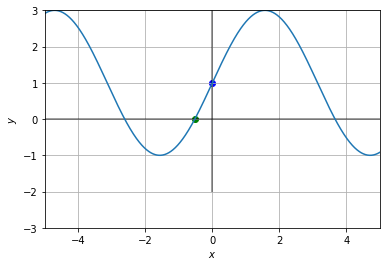

In [70]:
Sin(a = 2, c = 1).plot()

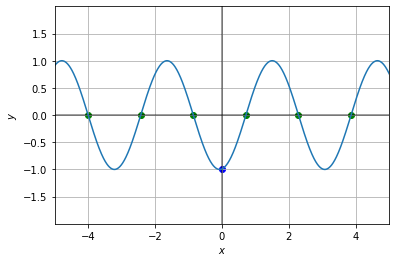

In [ ]:
Cos(exp = 1, n = -2, k = 3).plot(range = 5)

Distribucion normal o de campana:


$\phi(x) = \dfrac{1}{\sqrt[]{2\pi\sigma}}e^{-\tfrac{(x - \mu)^2}{2\sigma^2}}$

$\mu:$ media de la distribucion

$\sigma:$ desviacion standard

In [14]:
class NormalDistribution(Function):
  function_type = 'Normal Distribution'
  def __init__(self, mu, sigma):
    self.mu = mu
    self.sigma = sigma

  def calculate_values(self, x):
    y = 1 / np.sqrt(2 * np.pi * self.sigma)
    y *= np.e ** (-((x - self.mu)**2) / (2 * self.sigma ** 2))
    return y

  def plot_func(self, ax):
    mu = self.mu
    ax.scatter(0, self(0), color = Function.function_part['y-intercept'])
    ax.scatter(mu, self(mu), color = Function.function_part['vertex'])

  def __call__(self, x):
    return self.calculate_values(x)

  def __repr__(self):
    return f'Normal Distribution(mu = {self.mu}, sigma = {self.sigma})'

In [61]:
class BinomialDistribution(Function):
    function_type = 'Binomial Distribution'
    def __init__(self, n, p):
        self.n = n
        self.p = p
        if not 0 <= p <= 1:
            raise ValueError('The probability parameter, p, must be between 0 and 1')
    
    def calculate_values(self, x):
        c = combinatorial(n = self.n, k = x)
        y = c * self.p ** (x) * (1 - self.p) ** (self.n - x)
        return y

    def __call__(self, x):
        return self.calculate_values(x)

    def plot(self, **kwargs):
        fig, ax = plt.subplots()
        c = kwargs.get('c', None)
        plt.xlabel('$x$')
        plt.ylabel('$P(x)$')
        for i in range(1, self.n):
            ax.scatter(i, self(i), c = c)

    def __repr__(self):
        return f'X ~ B({self.n}, {self.p})'